In [0]:
#!pip install datadotworld
#!pip  install datadotworld[pandas]

In [0]:
#!dw configure

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np

In [0]:
import datadotworld as dw

In [0]:
# drive.mount("/content/drive")

In [9]:
ls

drive/  sample_data/


In [11]:
cd "drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [13]:
ls matrix_one

day3.ipynb


In [0]:
!mkdir data

In [0]:
!echo "data/" >> .gitignore

In [0]:
!git add .gitignore

In [0]:
data = dw.load_dataset("datafiniti/mens-shoe-prices")

In [22]:
data.dataframes

LazyLoadedDict({'7004_1': LazyLoadedValue(<pandas.DataFrame>)})

In [24]:
df = data.dataframes['7004_1']
df.shape

(19387, 48)

In [25]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
299,AVpfDMIKilAPnD_xT1Fn,NaN,Dockers,"Clothing, Shoes & Accessories,Men's Clothing,P...",Black,NaN,2016-02-17T16:52:16Z,2016-04-11T07:22:40Z,NaN,NaN,8.868783e+11,"[{""key"":""Style"",""value"":[""Khakis, Chinos""]},{""...",NaN,http://i.ebayimg.com/images/g/hxcAAOSwX~dWq6RS...,NaN,"0886878256905,886878256905,dockersmens810093co...",NaN,NaN,"[{""dateSeen"":[""2016-04-10T00:00:00Z""],""name"":""...",Dockers Men's 810093 Comfort Waistband Khaki F...,19.95,19.95,NaN,NaN,New with tags,NaN,USD,2016-02-17T16:52:16Z,2016-03-17T00:00:00Z,NaN,false,NaN,winning bid,NaN,FREE,NaN,NaN,http://www.ebay.com/itm/Dockers-Mens-810093-Co...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com/itm/Docke...",http://www.ebay.com/itm/Dockers-Mens-810093-Co...,886878256905,NaN,NaN,NaN
8092,AVpe5JbrilAPnD_xQPj1,NaN,TOP-BAG,"Luggage & Bags,Office Supplies,Home,Backpacks ...",NaN,NaN,2016-01-02T03:25:02Z,2016-04-05T22:03:44Z,NaN,5.5 in x 6.5 in x 7.5 in,NaN,NaN,NaN,http://c.shld.net/rpx/i/s/pi/mp/3793/prod_9603...,NaN,"topbag/adib00q6guqd8,topbagmensgenuineleatherb...",NaN,ADIB00Q6GUQD8,NaN,Top-bag Men's Genuine Leather Briefcase Laptop...,126.01,126.01,NaN,NaN,NaN,NaN,USD,2016-01-02T03:25:02Z,2016-03-31T00:00:00Z,NaN,true,FastMedia,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/config/produc...,NaN,NaN,NaN,NaN
4770,AVpfC924ilAPnD_xTwhf,NaN,SCOTT JAMES,"Clothing, Shoes & Accessories,Men's Clothing,P...",Gray,NaN,2016-03-09T04:10:45Z,2016-05-31T11:01:21Z,"[{""dateSeen"":[""2016-06-05T02:24:03Z""],""sourceU...",NaN,7.906735e+11,"[{""key"":""Style"",""value"":[""Casual Pants""]},{""ke...",NaN,http://i.ebayimg.com/images/g/CPcAAOSwcu5UTsgP...,NaN,newmensscottjamesdarkgrayfoster13casualpantssi...,NaN,NaN,"[{""dateSeen"":[""2016-05-30T00:00:00Z""],""name"":""...",New Mens Scott James Dark Gray Foster 13 Casua...,35.0,35.0,NaN,NaN,New with tags,NaN,USD,2016-05-31T10:53:35Z,2016-05-30T00:00:00Z,NaN,false,NaN,winning bid,NaN,USD 6.00,NaN,NaN,http://www.ebay.com/itm/NEW-MENS-SCOTT-JAMES-D...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com/itm/NEW-M...",http://www.ebay.com/itm/NEW-MENS-SCOTT-JAMES-D...,790673527071,NaN,NaN,NaN
13923,AVpfqn3rilAPnD_xgApe,NaN,Propet,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2017-01-09T19:46:27Z,2017-01-09T19:46:27Z,"[{""dateSeen"":[""2017-01-09T19:46:27Z""],""sourceU...",NaN,7.561119e+11,"[{""key"":""Season"",""value"":[""All-Season""]},{""key...",NaN,https://i5.walmartimages.com/asr/c6e61e4d-7874...,NaN,"756111880436,0756111880436,propet/m2034wht",Propet,M2034-WHT,"[{""dateSeen"":[""2017-01-09T19:46:27Z""],""name"":""...",Propet Stability Walker Men Us 11.5 B White Wa...,79.95,79.95,NaN,NaN,new,NaN,USD,2017-01-09T19:46:27Z,2017-01-08T00:00:00Z,NaN,false,Orthotic Shop - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Propet-Stability-Wa...,NaN,NaN,NaN,11.5,NaN,https://www.walmart.com/ip/Propet-Stability-Wa...,756111880436,NaN,NaN,NaN
11962,AVpfiqO2LJeJML43_EGk,NaN,Clarks,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-11-11T09:48:53Z,2016-11-11T09:48:53Z,"[{""dateSeen"":[""2016-11-11T09:48:53Z""],""sourceU...",NaN,8.893039e+11,"[{""key"":""Assembled in Country of Origin"",""valu...",NaN,https://i5.walmartimages.com/asr/d4f75f59-9d3c...,NaN,"889303912254,0889303912254,clarks/clk07881",Clarks,CLK_07881,"[{""dateSeen"":[""2016-11-11T09:48:53

In [28]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [29]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [30]:
df.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
new                                                   0.000155
New with box                                          0.000155
UnbeatableSale.com, Inc. - Walmart.com                0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
SHOEBACCA LTD. - Walmart.com                          0.000052
New without tags                                      0.000052
Shoes.com                                             0.000052
Name: prices_currency, dtype: float64

In [32]:
df_usd = df[ df.prices_currency == "USD" ].copy()
df_usd.shape

(18524, 48)

In [33]:
df_usd.prices_amountmin.head()

0    39.89
1    51.99
2    40.02
3    50.31
4    46.26
Name: prices_amountmin, dtype: object

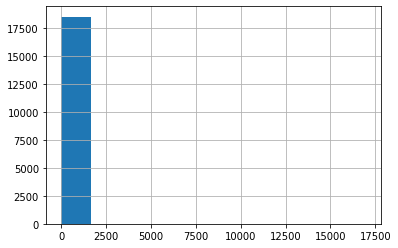

In [36]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

In [0]:
filter_max = np.percentile( df_usd['prices_amountmin'], 99)

In [0]:
df_usd_filter = df_usd[ df_usd['prices_amountmin'] < filter_max ]

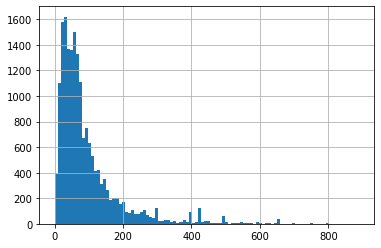

In [41]:
df_usd_filter.prices_amountmin.hist(bins = 100)